In [28]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [29]:
#Load PPG data
data = pd.read_csv('example_data.csv')

# Extract time and PPG values
time = data['t']
ppg = data['ppg']

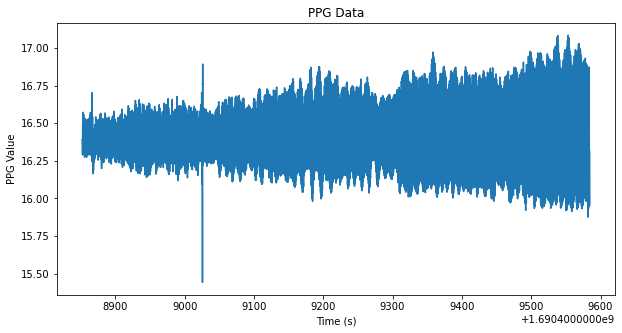

In [50]:
# Visual Inspection

# Simple plot of provided data
plt.figure(figsize=(10, 5))
plt.plot(time, ppg)
plt.xlabel('Time (s)')
plt.ylabel('PPG Value')
plt.title('PPG Data')
plt.show()

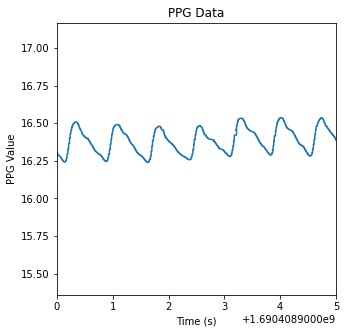

In [49]:
#There seems to be a lot of data. Visualization would be easier on a segment of the data.

# Plot for segmented data
start_time=1690408900
end_time=1690408905
plt.figure(figsize=(5, 5))
plt.xlim(start_time,end_time)
plt.plot(time, ppg)
plt.xlabel('Time (s)')
plt.ylabel('PPG Value')
plt.title('PPG Data')
plt.show()

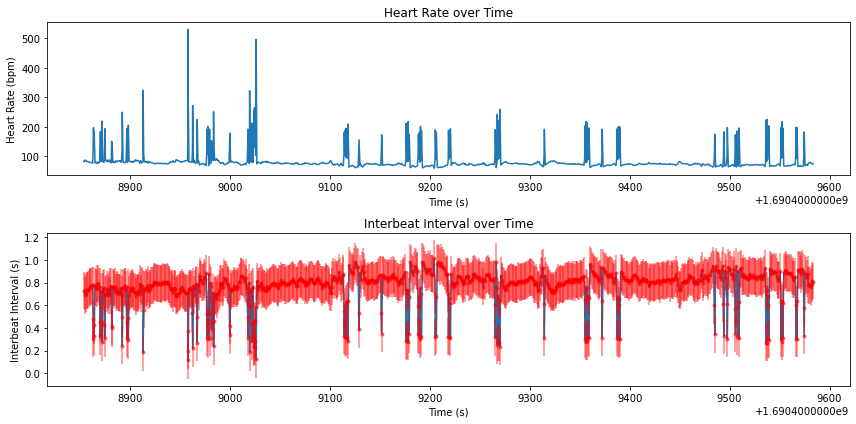

Mean Heart Rate: 88.07 bpm
Standard Deviation of Heart Rate: 42.64 bpm
Mean Interbeat Interval: 0.75 s
Standard Deviation of Interbeat Interval: 0.16 s


In [51]:
# Find peaks in the PPG signal
peaks, _ = find_peaks(ppg, height=0)

# Calculate interbeat interval (IBI) from peak times
ibi = np.diff(time[peaks])
hr = 60 / ibi

# Calculate mean HR and standard deviation
mean_hr = np.mean(hr)
std_hr = np.std(hr)

# Calculate mean IBI and standard deviation
mean_ibi = np.mean(ibi)
std_ibi = np.std(ibi)

# Generate plots
plt.figure(figsize=(12, 6))

# Plot Heart Rate over Time
plt.subplot(2, 1, 1)
plt.plot(time[peaks][1:], hr)
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate (bpm)')
plt.title('Heart Rate over Time')

# Plot Interbeat Interval over Time
plt.subplot(2, 1, 2)
plt.plot(time[peaks][1:], ibi)
plt.xlabel('Time (s)')
plt.ylabel('Interbeat Interval (s)')
plt.title('Interbeat Interval over Time')

# Add error bars to the IBI plot
plt.errorbar(time[peaks][1:], ibi, yerr=std_ibi, fmt='r.', ecolor='red', alpha=0.5)

# Show the plots
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Mean Heart Rate: {mean_hr:.2f} bpm")
print(f"Standard Deviation of Heart Rate: {std_hr:.2f} bpm")
print(f"Mean Interbeat Interval: {mean_ibi:.2f} s")
print(f"Standard Deviation of Interbeat Interval: {std_ibi:.2f} s")